# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config info
url='http://api.openweathermap.org/data/2.5/weather?'
units='imperial'

# Build partial query URL:
query_url=f'{url}appid={weather_api_key}&units={units}&q='

In [4]:
city_name=[]       # list for city name
cloudiness=[]      # list for cloudines
country=[]         # list for country
date=[]            # list for date
humidity=[]        # list for humidity
latitude=[]        # list for latitude
longitude=[]       # list for longitude
max_temp=[]        # list for max temperature
wind_speed=[]      # list for wind speed

count_start = 1

print('Beginning Data Retrieval')     
print('-----------------------------')
for city in cities:
        response=requests.get(query_url + city).json()
        
        print('Processing Record ' + str(count_start) + ' of ' + str(len(cities)) + ' | ' + city)
        
        try:                                            
            city_name.append(response['name'])
            cloudiness.append(response['clouds']['all'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            humidity.append(response['main']['humidity'])             
            latitude.append(response['coord']['lat'])
            longitude.append(response['coord']['lon'])             
            max_temp.append(response['main']['temp_max'])
            wind_speed.append(response['wind']['speed'])   
            
        except KeyError:
            # In case one of the responses comes back with error "KeyError"
            print(city + ' city not found. Skipping...') 
                                                              
        count_start=count_start+1
        
        # Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 606 | yellowknife
Processing Record 2 of 606 | sur
Processing Record 3 of 606 | leningradskiy
Processing Record 4 of 606 | port hardy
Processing Record 5 of 606 | pakpattan
Processing Record 6 of 606 | new norfolk
Processing Record 7 of 606 | albany
Processing Record 8 of 606 | bluff
Processing Record 9 of 606 | mataura
Processing Record 10 of 606 | castro
Processing Record 11 of 606 | maldonado
Processing Record 12 of 606 | hermanus
Processing Record 13 of 606 | mackay
Processing Record 14 of 606 | korla
Processing Record 15 of 606 | saint-philippe
Processing Record 16 of 606 | alice town
Processing Record 17 of 606 | sao joao da barra
Processing Record 18 of 606 | avera
Processing Record 19 of 606 | petropavlovka
Processing Record 20 of 606 | carnarvon
Processing Record 21 of 606 | kadoma
Processing Record 22 of 606 | bur gabo
bur gabo city not found. Skipping...
Processing Record 23 of 606 | jamestown
Proc

Processing Record 189 of 606 | malwan
malwan city not found. Skipping...
Processing Record 190 of 606 | ponta do sol
Processing Record 191 of 606 | ikalamavony
Processing Record 192 of 606 | salalah
Processing Record 193 of 606 | whitehorse
Processing Record 194 of 606 | fairbanks
Processing Record 195 of 606 | chapais
Processing Record 196 of 606 | tabou
Processing Record 197 of 606 | margate
Processing Record 198 of 606 | sioux lookout
Processing Record 199 of 606 | narsaq
Processing Record 200 of 606 | san rafael
Processing Record 201 of 606 | saint-pierre
Processing Record 202 of 606 | cherskiy
Processing Record 203 of 606 | ancud
Processing Record 204 of 606 | tazovskiy
Processing Record 205 of 606 | port hawkesbury
Processing Record 206 of 606 | geraldton
Processing Record 207 of 606 | stromness
Processing Record 208 of 606 | ust-kuyga
Processing Record 209 of 606 | hofn
Processing Record 210 of 606 | clyde river
Processing Record 211 of 606 | valparaiso
Processing Record 212 of 

Processing Record 377 of 606 | port-gentil
Processing Record 378 of 606 | nanortalik
Processing Record 379 of 606 | kasama
Processing Record 380 of 606 | prince rupert
Processing Record 381 of 606 | yarada
Processing Record 382 of 606 | sabang
Processing Record 383 of 606 | rocha
Processing Record 384 of 606 | ilulissat
Processing Record 385 of 606 | jurm
Processing Record 386 of 606 | ballina
Processing Record 387 of 606 | namibe
Processing Record 388 of 606 | vanimo
Processing Record 389 of 606 | ambatondrazaka
Processing Record 390 of 606 | grand-santi
Processing Record 391 of 606 | temaraia
temaraia city not found. Skipping...
Processing Record 392 of 606 | nyandoma
Processing Record 393 of 606 | yumen
Processing Record 394 of 606 | luba
Processing Record 395 of 606 | jinchang
Processing Record 396 of 606 | vangaindrano
Processing Record 397 of 606 | quatre cocos
Processing Record 398 of 606 | homer
Processing Record 399 of 606 | maningrida
Processing Record 400 of 606 | grand cent

Processing Record 567 of 606 | yankton
Processing Record 568 of 606 | byron bay
Processing Record 569 of 606 | tommot
Processing Record 570 of 606 | komsomolskiy
Processing Record 571 of 606 | dingle
Processing Record 572 of 606 | xam nua
Processing Record 573 of 606 | wilmington
Processing Record 574 of 606 | puerto varas
Processing Record 575 of 606 | jumla
Processing Record 576 of 606 | winona
Processing Record 577 of 606 | jaisalmer
Processing Record 578 of 606 | maghama
maghama city not found. Skipping...
Processing Record 579 of 606 | abu jubayhah
abu jubayhah city not found. Skipping...
Processing Record 580 of 606 | haines junction
Processing Record 581 of 606 | mergui
mergui city not found. Skipping...
Processing Record 582 of 606 | pacific grove
Processing Record 583 of 606 | casablanca
Processing Record 584 of 606 | osakarovka
Processing Record 585 of 606 | pomabamba
Processing Record 586 of 606 | vicuna
Processing Record 587 of 606 | baiyin
Processing Record 588 of 606 | sh

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a DataFrame from Cities, Latitude, Longitude, Temperature, Humidity, Cloudiness & Wind Speed
weather_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature (F)": max_temp,
    "Humidity (%)": humidity,
    "Cloudiness (%)": cloudiness,
    "Wind Speed (mph)": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.isnull().sum()
weather_data.dropna() 
weather_data.count()

City                   552
Country                552
Date                   552
Latitude               552
Longitude              552
Max Temperature (F)    552
Humidity (%)           552
Cloudiness (%)         552
Wind Speed (mph)       552
dtype: int64

In [6]:
weather_data.head()

,City,Country,Date,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Yellowknife,CA,1613663212,62.4560,-114.3525,-7.01,77,75,11.50
1,Sur,OM,1613663213,22.5667,59.5289,72.01,42,46,9.04
2,Leningradskiy,RU,1613663213,69.3833,178.4167,-22.68,86,55,4.59
3,Port Hardy,CA,1613663213,50.6996,-127.4199,42.80,70,75,26.46
4,Pakpattan,PK,1613663213,30.3410,73.3866,66.31,15,0,6.20


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
weather_data.loc[weather_data['Humidity (%)'] > 100]

,City,Country,Date,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

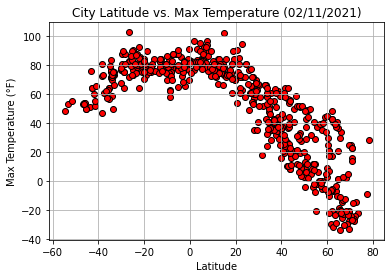

In [9]:
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature (F)"], facecolors="red", marker="o", edgecolor="black")

plt.title("City Latitude vs. Max Temperature (02/11/2021)")
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure:
#plt.savefig("output_data/City Latitude vs. MaxTemp.png")

plt.show()

## Latitude vs. Humidity Plot

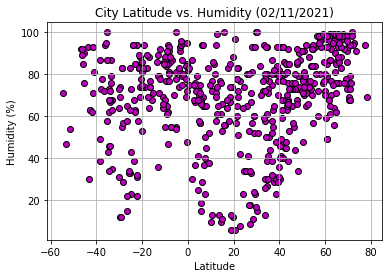

In [10]:
plt.scatter(weather_data["Latitude"], weather_data["Humidity (%)"], facecolors="m", marker="o", edgecolor="black")

plt.title("City Latitude vs. Humidity (02/11/2021)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Latitude vs. Cloudiness Plot

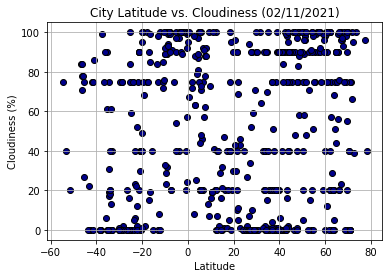

In [11]:
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness (%)"], facecolors="darkblue", marker="o", edgecolor="black")

plt.title("City Latitude vs. Cloudiness (02/11/2021)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()

## Latitude vs. Wind Speed Plot

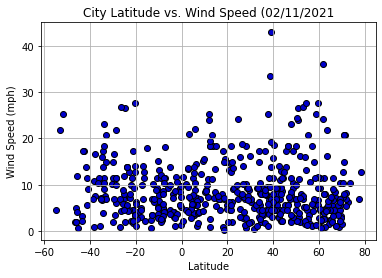

In [12]:
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed (mph)"], facecolors="mediumblue", marker="o", edgecolor="black")

plt.title("City Latitude vs. Wind Speed (02/11/2021")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.show()


## Linear Regression

In [13]:
weather_data_north = weather_data[weather_data['Latitude'] >= 0]
weather_data_south = weather_data[weather_data['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.78


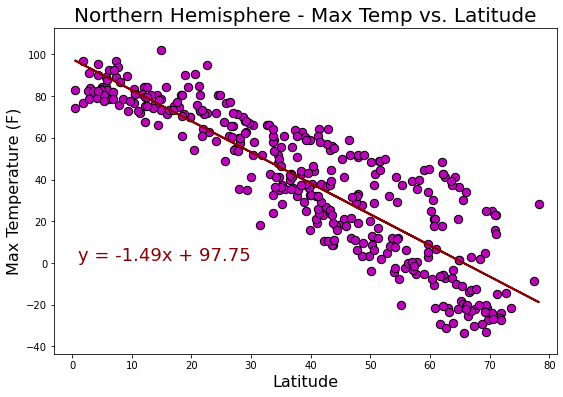

In [25]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Latitude']
y_values = weather_data_north['Max Temperature (F)']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='m', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)
plt.title('Northern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(1, 1), fontsize=18, color='darkred')

# Set the limits 
plt.ylim(min(weather_data['Max Temperature (F)'])-10, max(weather_data['Max Temperature (F)'])+10)
plt.xlim(-3, max(weather_data['Latitude'])+3)

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.31


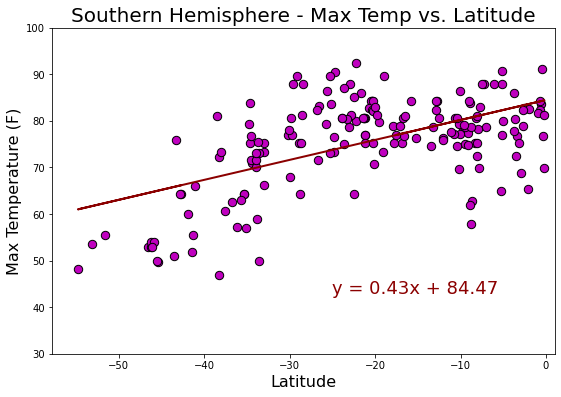

In [24]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['Latitude']
y_values = weather_data_south['Max Temperature (F)']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq2 = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='m', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)
plt.title('Southern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq2,(-25,43),fontsize=18, color='darkred')


# Set the limits 
plt.ylim(30, 100)
plt.xlim(min(weather_data['Latitude'])-3, +1)

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.19


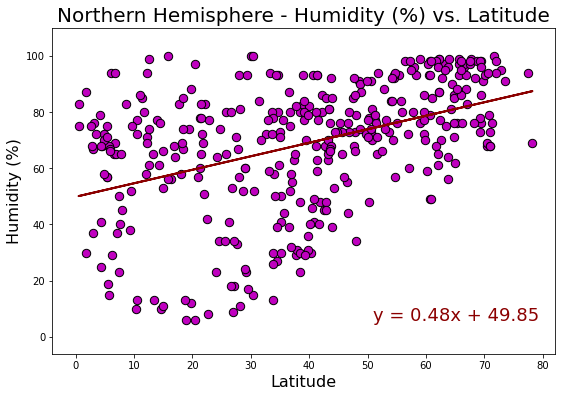

In [23]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Latitude']
y_values = weather_data_north['Humidity (%)']

# Perform a linear regression for humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='m', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(51,6),fontsize=18, color='darkred')

# Set the limits 
plt.ylim(-6, 110)
plt.xlim(-4, 82)

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.19


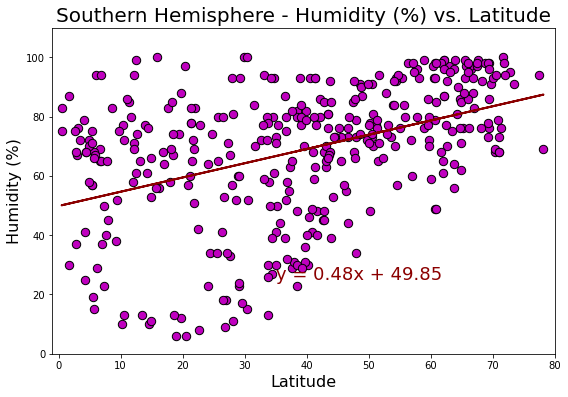

In [40]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Latitude']
y_values = weather_data_north['Humidity (%)']

# Perform a linear regression for cloudiness vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='m', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(35,25), fontsize=18, color='darkred')

# Set the limits :
plt.ylim(0, 110)
plt.xlim(-1, 80)

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04


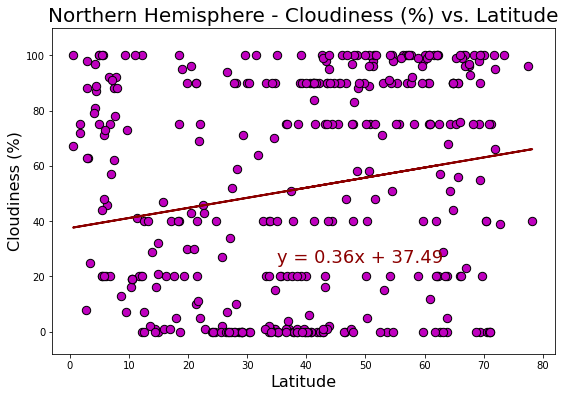

In [30]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Latitude']
y_values = weather_data_north['Cloudiness (%)']

# Perform a linear regression for cloudiness vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='m', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(35,25), fontsize=18, color='darkred')

# Set the limits 
plt.ylim(-8, 110)
plt.xlim(-3, 82)

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.17


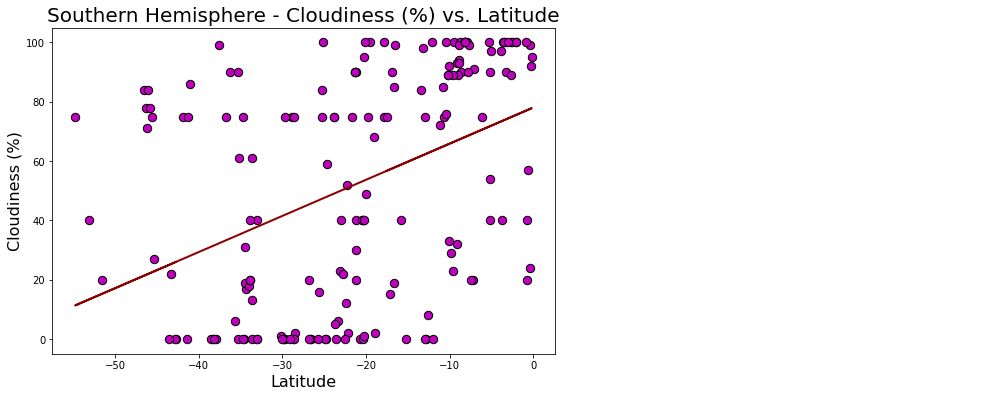

In [45]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['Latitude']
y_values = weather_data_south['Cloudiness (%)']

# Perform a linear regression for cloudiness vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='m', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(35,25), fontsize=18, color='darkred')


# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0


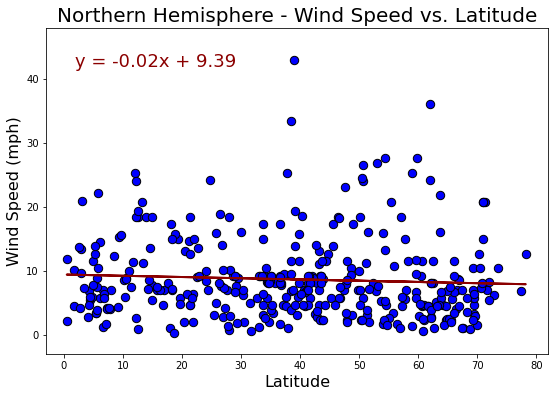

In [48]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Latitude']
y_values = weather_data_north['Wind Speed (mph)']

# Perform a linear regression for wind speed vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='b', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)
plt.title('Northern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(2,42), fontsize=18, color='darkred')

# Set the limits 
plt.ylim(-3, 48)
plt.xlim(-3, 82)

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

# Show plot:
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05


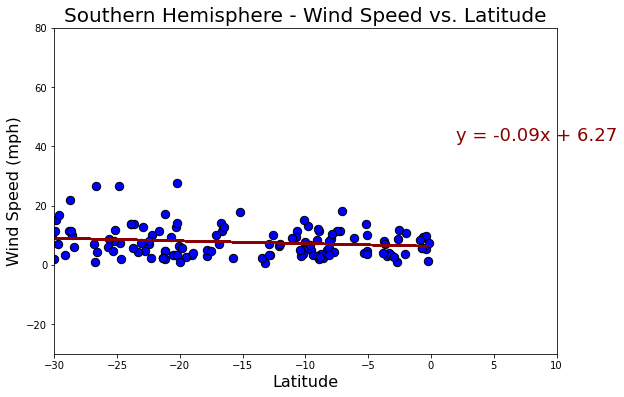

In [50]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['Latitude']
y_values = weather_data_south['Wind Speed (mph)']

# Perform a linear regression for wind speed vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='b', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)
plt.title('Southern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(2,42), fontsize=18, color='darkred')

# Set the limits 
plt.ylim(0, 80)
plt.xlim(-30, 10)

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

# Show plot:
plt.show()